<a href="https://colab.research.google.com/github/VladislavBuzanov/ml/blob/main/%D0%A1_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def check():
    for i in range(0, len(cluster)):
        for j in range(0, clusters_count):
            if cluster[i] == j:
                u[i][j] = 1
            else:
                u[i][j] = 0


def clusters(x_cc, y_cc, x, y):
    for i in range(0, n):
        r = dist(x_cc[0], y_cc[0], x[i], y[i])
        numb = 0
        for j in range(0, clusters_count):
            if r < dist(x_cc[j], y_cc[j], x[i], y[i]):
                numb = j
                r = dist(x_cc[j], y_cc[j], x[i], y[i])
            if j == clusters_count - 1:
                cluster[i] = numb

def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [ ]:
n = 40
x = np.random.randint(1, 1000, n)
y = np.random.randint(1, 1000, n)

x_c = np.mean(x)
y_c = np.mean(y)

clusters_count, max_iter = 4, 4

m, eps = 2, 0.2
u = np.zeros([n, clusters_count])
u_new = np.zeros([n, clusters_count])


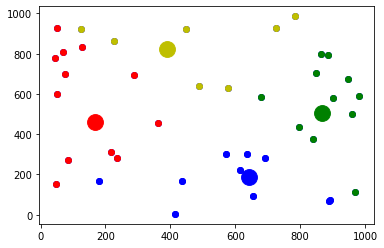

In [ ]:
R = 0
for i in range(0, n):
    if dist(x_c, y_c, x[i], y[i]) > R:
        R = dist(x_c, y_c, x[i], y[i])

x_center_of_mass = [R * np.cos(2 * np.pi * i / clusters_count) + x_c for i in range(clusters_count)]
y_center_of_mass = [R * np.sin(2 * np.pi * i / clusters_count) + y_c for i in range(clusters_count)]

cluster = [0] * n

clusters(x_center_of_mass, y_center_of_mass, x, y)
check()

for dik in range(max_iter):
    u_sum = [0] * n
    for i in range(0, n):
        for j in range(0, clusters_count):
            u_sum[i] += u[i][j]

    for i in range(0, n):
        for j in range(0, clusters_count):
            sum = 0
            for l in range(0, clusters_count):
                if cluster[i] == l:
                    sum += (dist(x_center_of_mass[j], y_center_of_mass[j], x[i], y[i]) / dist(x_center_of_mass[l],
                                                                                              y_center_of_mass[l], x[i],
                                                                                              y[i])) ** (2 / (m - 1))
            u_new[i][j] = 1 / sum

    for i in range(0, clusters_count):
        x_down_sum = 0
        x_up_sum = 0
        y_down_sum = 0
        y_up_sum = 0
        for j in range(0, n):
            if cluster[j] == i:
                x_down_sum += (u_sum[j]) ** m
                x_up_sum += (x[j] * ((u_sum[j]) ** m))

                y_down_sum += (u_sum[j]) ** m
                y_up_sum += (y[j] * ((u_sum[j]) ** m))
        x_center_of_mass[i] = x_up_sum / x_down_sum
        y_center_of_mass[i] = y_up_sum / y_down_sum

    flag = True
    for i in range(0, n):
        for j in range(0, clusters_count):
            if u[i][j] - u_new[i][j] < eps:
                flag = False
    if flag:
        dik = max_iter
        break

    for i in range(0, n):
        for j in range(0, clusters_count):
            u[i][j] = u_new[i][j]

plt.scatter(x, y, color='b')
for i in range(0, n):
    if cluster[i] == 0:
        plt.scatter(x[i], y[i], color='r')
    if cluster[i] == 1:
        plt.scatter(x[i], y[i], color='b')
    if cluster[i] == 2:
        plt.scatter(x[i], y[i], color='g')
    if cluster[i] == 3:
        plt.scatter(x[i], y[i], color='y')
plt.scatter(x_center_of_mass[0], y_center_of_mass[0], marker='o', c='r', s=250)
if clusters_count > 1:
    plt.scatter(x_center_of_mass[1], y_center_of_mass[1], marker='o', c='b', s=250)
if clusters_count > 2:
    plt.scatter(x_center_of_mass[2], y_center_of_mass[2], marker='o', c='g', s=250)
if clusters_count > 3:
    plt.scatter(x_center_of_mass[3], y_center_of_mass[3], marker='o', c='y', s=250)

plt.show()